# Tarea N°02

## Instrucciones

1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.


* __Nombre__: Sergio Suarez

* __Rol__: 201810513-9

2.- Debes _pushear_ este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")



%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [5]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [6]:
#Veamos la información general de los datos:
digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   c00     1797 non-null   int32
 1   c01     1797 non-null   int32
 2   c02     1797 non-null   int32
 3   c03     1797 non-null   int32
 4   c04     1797 non-null   int32
 5   c05     1797 non-null   int32
 6   c06     1797 non-null   int32
 7   c07     1797 non-null   int32
 8   c08     1797 non-null   int32
 9   c09     1797 non-null   int32
 10  c10     1797 non-null   int32
 11  c11     1797 non-null   int32
 12  c12     1797 non-null   int32
 13  c13     1797 non-null   int32
 14  c14     1797 non-null   int32
 15  c15     1797 non-null   int32
 16  c16     1797 non-null   int32
 17  c17     1797 non-null   int32
 18  c18     1797 non-null   int32
 19  c19     1797 non-null   int32
 20  c20     1797 non-null   int32
 21  c21     1797 non-null   int32
 22  c22     1797 non-null   int32
 23  c23     1797 

Tipo de datos: No hay datos nulos, Ademas todas las columnas son del tipo "int32", es decir no tenemos variables categoricas, solo numericas.

In [7]:
digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


Veamos como los datos estan distribuidos:

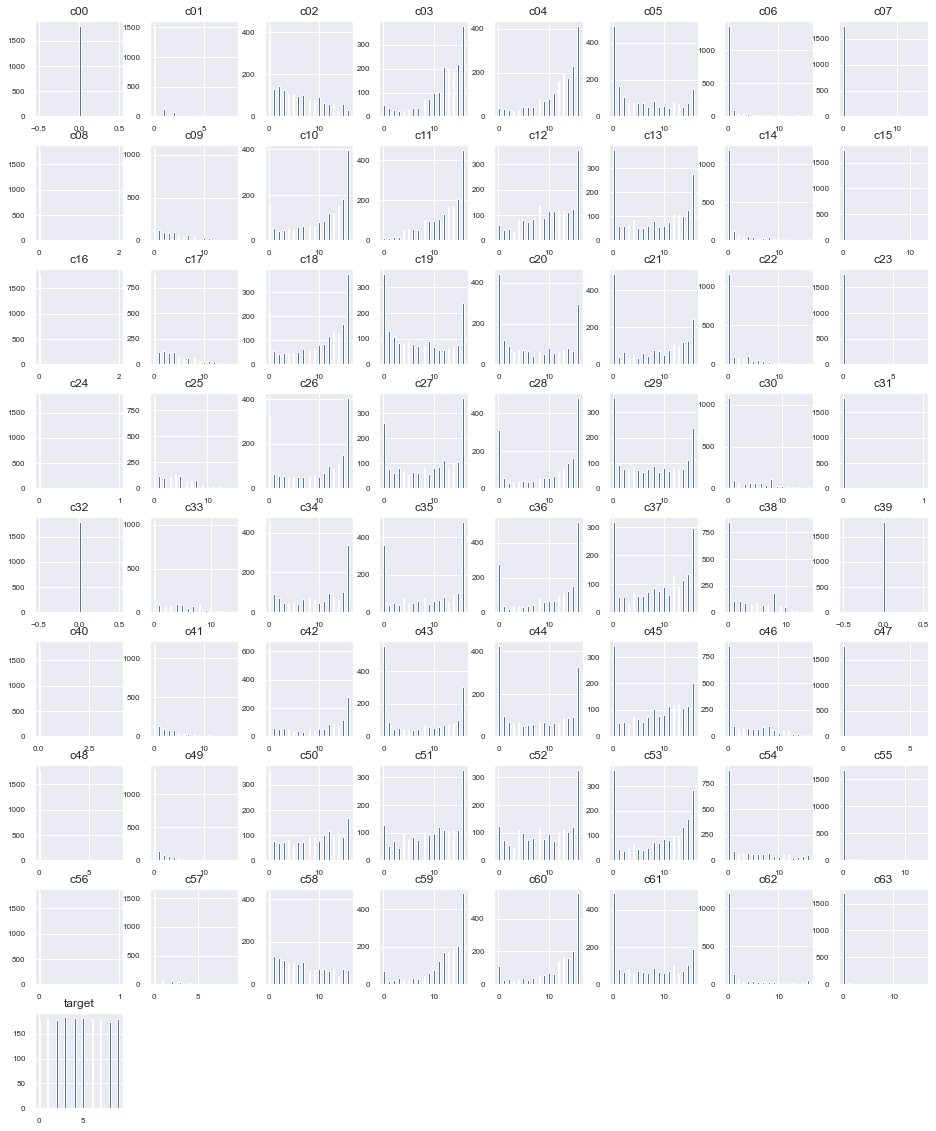

In [8]:
digits.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

A simple vista, hay algunas variables con distribuciones similares, analicemos la correlacion c/r a la variable target:

In [9]:
digits.corr()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
c00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
c01,NaN,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,0.556372,...,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889,-0.051834
c02,NaN,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,0.582259,...,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523,-0.011836
c03,NaN,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,0.328344,...,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971,-0.011489
c04,NaN,-0.018761,-0.084235,0.023938,1.000000,0.507731,0.127764,0.010065,0.042065,0.051657,...,-0.212220,0.017352,-0.047223,-0.020176,-0.008867,-0.082125,-0.215809,-0.250699,-0.215349,0.100801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c60,NaN,-0.102349,-0.134754,-0.065957,-0.082125,-0.351146,-0.383522,-0.178243,0.048996,-0.000604,...,0.105101,0.005697,-0.117908,-0.207957,0.058390,1.000000,0.609515,0.243305,0.103015,-0.196083
c61,NaN,-0.029870,-0.041183,-0.054936,-0.215809,-0.268818,-0.304111,-0.141174,0.033409,0.071488,...,0.262795,-0.003056,-0.043889,-0.091839,-0.094956,0.609515,1.000000,0.648328,0.261991,-0.079100
c62,NaN,0.026547,0.072599,0.053437,-0.250699,-0.267659,-0.178945,-0.063220,0.020689,0.111569,...,0.511726,-0.011932,0.014557,0.035369,0.006849,0.243305,0.648328,1.000000,0.620428,-0.114007
c63,NaN,-0.043889,0.082523,0.081971,-0.215349,-0.167727,-0.080309,-0.024505,-0.005226,-0.001404,...,0.563989,-0.004625,-0.047089,0.031193,0.099671,0.103015,0.261991,0.620428,1.000000,-0.181929


In [10]:
digits_corr = digits.corr()['target'][:-1] 
golden_features_list = digits_corr[abs(digits_corr) > 0.5].sort_values(ascending=False)
print("Hay {} valores correlacionados con la variable Target:\n{}".format(len(golden_features_list), golden_features_list))

Hay 0 valores correlacionados con la variable Target:
Series([], Name: target, dtype: float64)


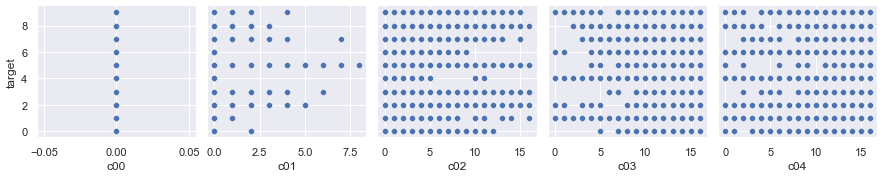

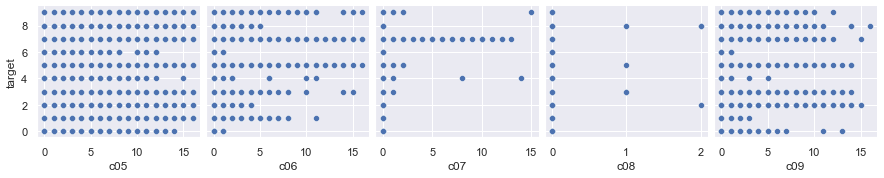

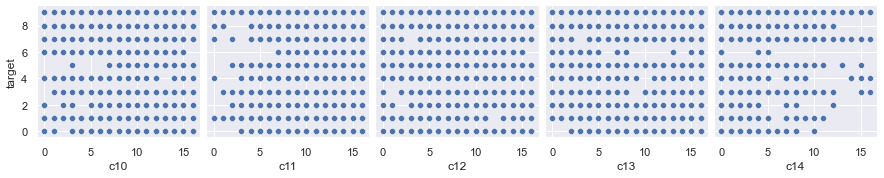

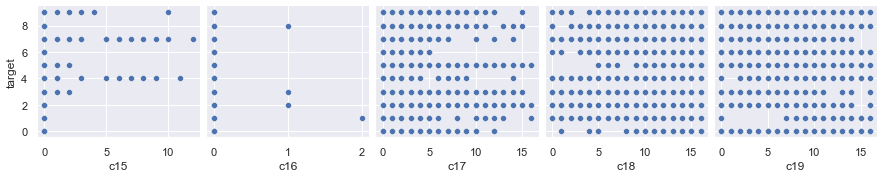

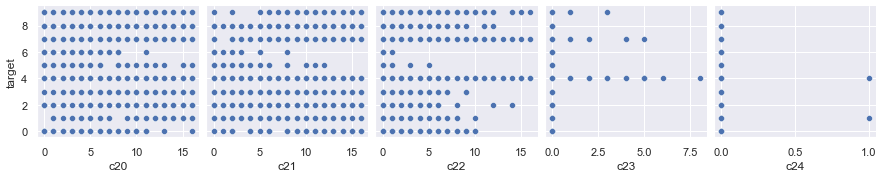

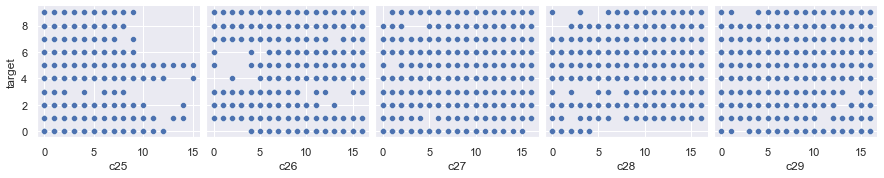

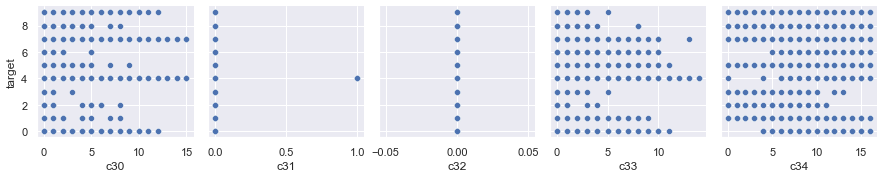

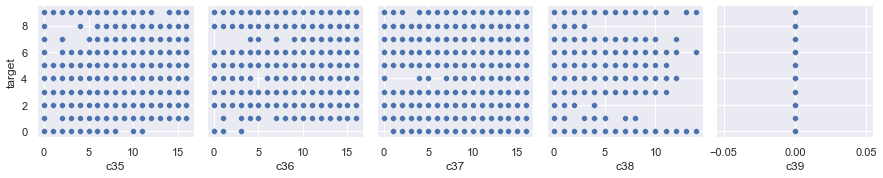

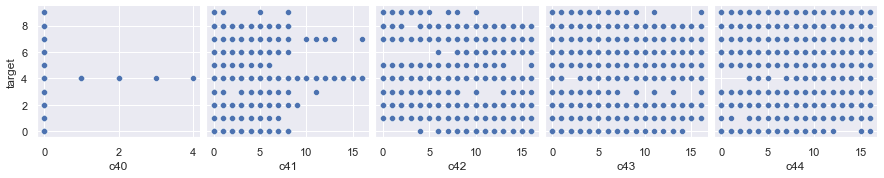

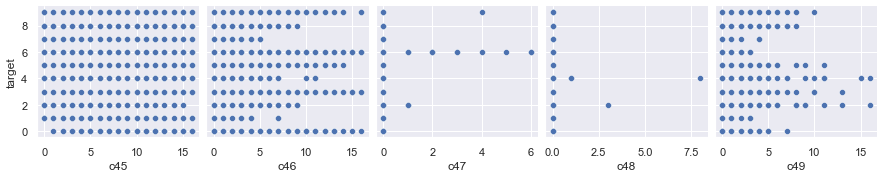

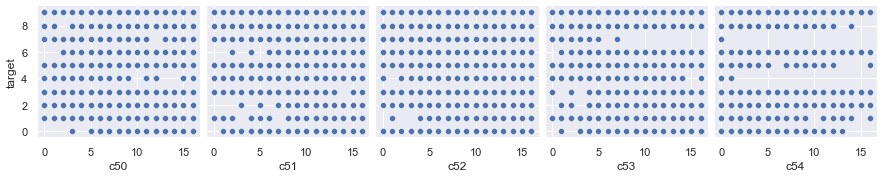

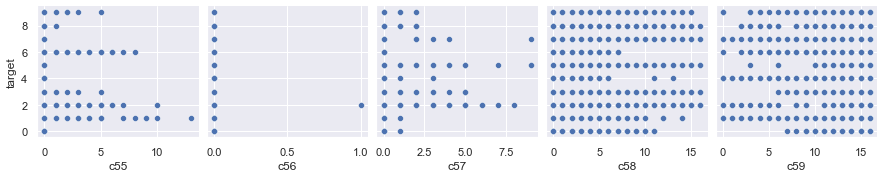

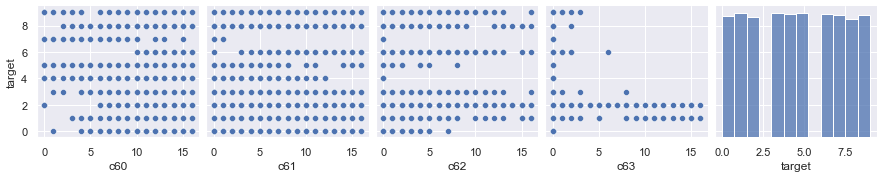

In [11]:
for i in range(0, len(digits.columns), 5):
    sns.pairplot(data=digits,
                x_vars=digits.columns[i:i+5],
                y_vars=['target'])

Existen muchos valores que se acumulan en 0, limpiaremos estos valores para ver si encontramos alguna correlación

In [12]:
import operator

individual_features_df = []
for i in range(0, len(digits.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = digits[[digits.columns[i], 'target']]
    tmpDf = tmpDf[tmpDf[digits.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['target'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

            c00:             nan
            c16: -0.5360562674188973
            c12: -0.24998011123749064
            c23: -0.23060391115612658
            c25: -0.22610174007309922
            c20: -0.1814857566640469
            c30: -0.16002888656828773
            c11: -0.14046884623673703
            c09: -0.11562106336247548
            c19: -0.11212437687329674
            c01: -0.09268843893668764
            c03: -0.07202862239097411
            c26: -0.06895730156246578
            c02: -0.06443804972444235
            c28: -0.0032432596920321495
            c17: 0.01800169942898928
            c07: 0.031668884964146986
            c10: 0.03394096598422649
            c22: 0.037729276383157644
            c15: 0.06129452394260671
            c18: 0.06823229997807999
            c13: 0.07484454876944768
            c04: 0.09763716944782197
            c27: 0.12891862550422667
            c05: 0.18043137008636911
            c21: 0.21928611620391833
            c14: 0.2238823

Limpiando los datos obtenemos una variable correlacionada, veamos cual es:

In [13]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("Hay {} valor correlacionado con la variable target:\n{}".format(len(golden_features_list), golden_features_list))

Hay 1 valor correlacionado con la variable target:
['c16']


Bajo este proceso concluímos lo siguiente:
* Pueden exister algunos patrones entre las variables que no pude identificar.
* Algunos atributos, como c40, c48 entre otros, presentan un patron con lineas verticales, desconozco si necesitan un tratamiento especial

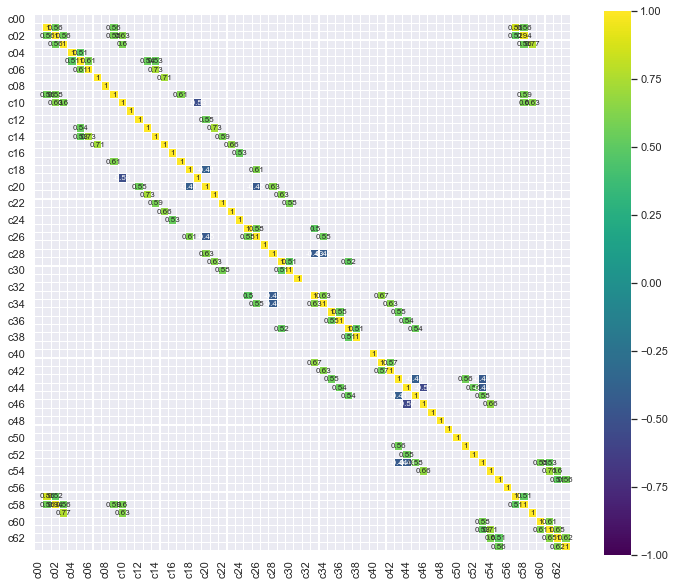

In [14]:
corr = digits.drop('target', axis=1).corr()#ya vimos la correlacion ded target
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [15]:
digits_dict["images"][0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

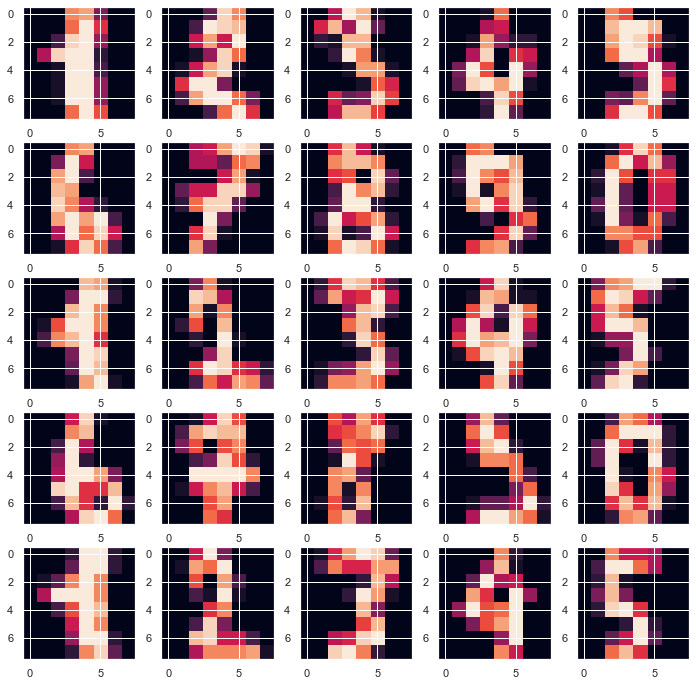

In [16]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(digits_dict["images"][i])

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [17]:
X = digits.drop(columns="target").values
y = digits["target"].values

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [20]:
print('train:', len(X_train), len(y_train))
print('testeo:', len(X_test), len(y_test))

train: 1257 1257
testeo: 540 540


### Logistic Regression:

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model1 = LogisticRegression() 

param_grid = {'penalty': ['l1', 'l2', 'elasticnet'], 'C':[1, 10]}

gs_rfc = GridSearchCV(model1, param_grid)
gs_rfc.fit(X_train, y_train)
print("Best: %f con %s" % (gs_rfc.best_score_, gs_rfc.best_params_))

Best: 0.956254 con {'C': 1, 'penalty': 'l2'}


In [23]:
model1_new=LogisticRegression(penalty='l2', C=1)
model1_new.fit(X_train, y_train)
y_true =  list(y_test)
y1_pred = list(model1_new.predict(X_test))


Matriz de confusion:
 
[[44  0  0  0  0  0  0  0  0  0]
 [ 0 60  0  0  2  0  1  0  3  2]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0 51  0  1  0  1  1  1]
 [ 0  0  0  0 52  0  0  1  0  0]
 [ 0  0  0  1  0 45  0  1  0  0]
 [ 0  1  0  0  0  0 57  0  0  0]
 [ 0  0  0  0  0  0  0 49  0  1]
 [ 0  3  0  0  0  3  0  0 52  0]
 [ 0  0  0  0  0  0  0  3  1 51]]


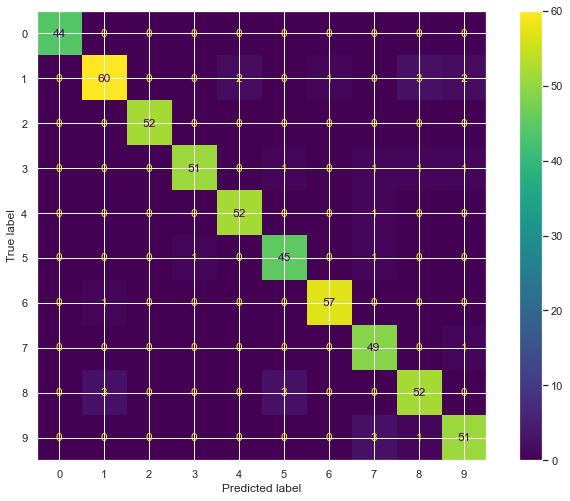

In [24]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y1_pred))
mat=plot_confusion_matrix(model1_new,X_test,y_test)

In [25]:
#Métricas
target_names = [ str(i) for i in range(0,10)]
print(classification_report(y_test, y1_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        44
           1    0.93750   0.88235   0.90909        68
           2    1.00000   1.00000   1.00000        52
           3    0.98077   0.92727   0.95327        55
           4    0.96296   0.98113   0.97196        53
           5    0.91837   0.95745   0.93750        47
           6    0.98276   0.98276   0.98276        58
           7    0.89091   0.98000   0.93333        50
           8    0.91228   0.89655   0.90435        58
           9    0.92727   0.92727   0.92727        55

    accuracy                        0.95000       540
   macro avg    0.95128   0.95348   0.95195       540
weighted avg    0.95065   0.95000   0.94990       540



### Random Forest:

In [26]:
model2 = RandomForestClassifier() 

param_grid = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

gs_rfc = GridSearchCV(model2, param_grid)
gs_rfc.fit(X_train, y_train)
print("Best: %f con %s" % (gs_rfc.best_score_, gs_rfc.best_params_))

Best: 0.976137 con {'max_features': 'log2', 'n_estimators': 200}


In [27]:
model2_new= RandomForestClassifier(n_estimators=700, max_features='sqrt')
model2_new.fit(X_train, y_train)
y_true =  list(y_test)
y2_pred = list(model2_new.predict(X_test))


Matriz de confusion:
 
[[44  0  0  0  0  0  0  0  0  0]
 [ 0 68  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 52  0  0  1  0  0]
 [ 0  0  0  0  1 46  0  0  0  0]
 [ 1  0  0  0  0  0 57  0  0  0]
 [ 0  0  0  0  0  0  0 49  1  0]
 [ 0  3  0  1  0  0  0  1 53  0]
 [ 0  0  0  0  0  1  0  5  2 47]]


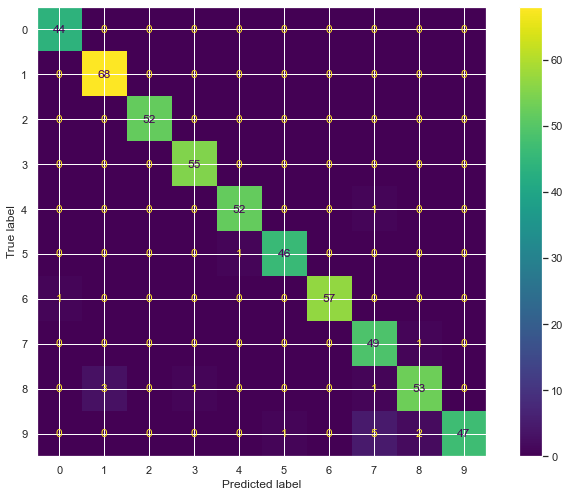

In [28]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y2_pred))
mat=plot_confusion_matrix(model2_new,X_test,y_test)

In [29]:
#Métricas
target_names = [ str(i) for i in range(0,10)]
print(classification_report(y_test, y2_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

           0    0.97778   1.00000   0.98876        44
           1    0.95775   1.00000   0.97842        68
           2    1.00000   1.00000   1.00000        52
           3    0.98214   1.00000   0.99099        55
           4    0.98113   0.98113   0.98113        53
           5    0.97872   0.97872   0.97872        47
           6    1.00000   0.98276   0.99130        58
           7    0.87500   0.98000   0.92453        50
           8    0.94643   0.91379   0.92982        58
           9    1.00000   0.85455   0.92157        55

    accuracy                        0.96852       540
   macro avg    0.96990   0.96910   0.96853       540
weighted avg    0.97002   0.96852   0.96830       540



### svm.SVC

In [30]:
from sklearn import svm
from sklearn.svm import SVC

In [31]:
parameters = {'kernel':['linear', 'polynomial', 'rbf', 'sigmoid'], 'C':range(11), 'degree' : range(11) }
model3 = svm.SVC()
gs_svm = GridSearchCV(model3, parameters)
gs_svm.fit(X_train, y_train)
print("Best: %f con %s" % (gs_svm.best_score_, gs_svm.best_params_))

Best: 0.991245 con {'C': 3, 'degree': 0, 'kernel': 'rbf'}


In [32]:
model3_new= svm.SVC(C=3, degree=0, kernel='rbf')
model3_new.fit(X_train, y_train)
y_true =  list(y_test)
y3_pred = list(model3_new.predict(X_test))


Matriz de confusion:
 
[[44  0  0  0  0  0  0  0  0  0]
 [ 0 68  0  0  0  0  0  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 53  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 58  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  3  0  0  0  0  0  0 55  0]
 [ 0  0  0  0  0  0  0  0  1 54]]


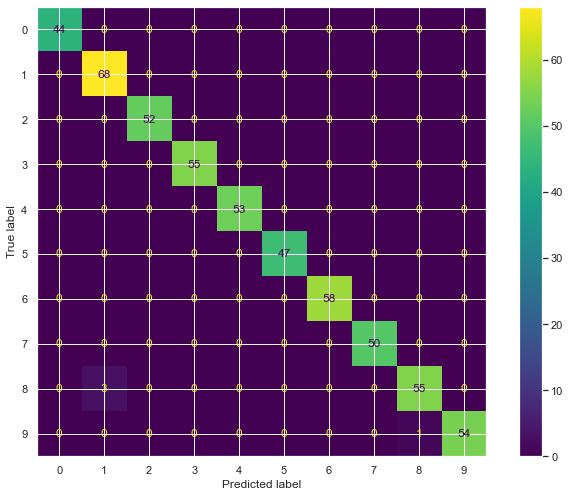

In [33]:
print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y3_pred))
mat=plot_confusion_matrix(model3_new,X_test,y_test)

In [34]:
#Métricas
target_names = [ str(i) for i in range(0,10)]
print(classification_report(y_test, y3_pred, target_names=target_names, digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        44
           1    0.95775   1.00000   0.97842        68
           2    1.00000   1.00000   1.00000        52
           3    1.00000   1.00000   1.00000        55
           4    1.00000   1.00000   1.00000        53
           5    1.00000   1.00000   1.00000        47
           6    1.00000   1.00000   1.00000        58
           7    1.00000   1.00000   1.00000        50
           8    0.98214   0.94828   0.96491        58
           9    1.00000   0.98182   0.99083        55

    accuracy                        0.99259       540
   macro avg    0.99399   0.99301   0.99342       540
weighted avg    0.99276   0.99259   0.99258       540



En conclusión el mejor modelo es SVM, dada su 'accuracy' de un 99%. Los otros le siguen de cerca con 97% y 95%

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [35]:
from sklearn.model_selection import cross_val_score
SVM = svm.SVC(kernel='rbf', C=3, degree=0)
scores = cross_val_score(SVM, X_train, y_train, cv=10)
print("intervalo de confianza para Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

intervalo de confianza para Accuracy: 0.99 (+/- 0.02)


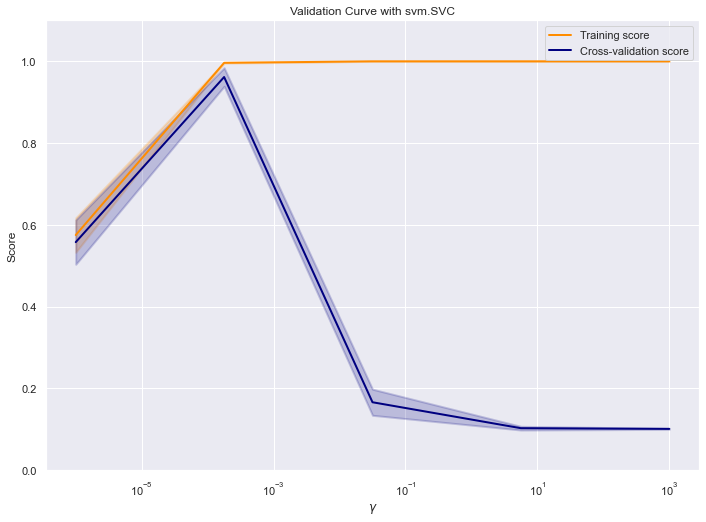

In [36]:
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve

X, y = load_digits(return_X_y=True)

param_range = np.logspace(-6, 3, 5)
train_scores, test_scores = validation_curve(
    svm.SVC(kernel='rbf', C=3, degree=0),
    X,
    y,
    param_name="gamma",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=1,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with svm.SVC")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

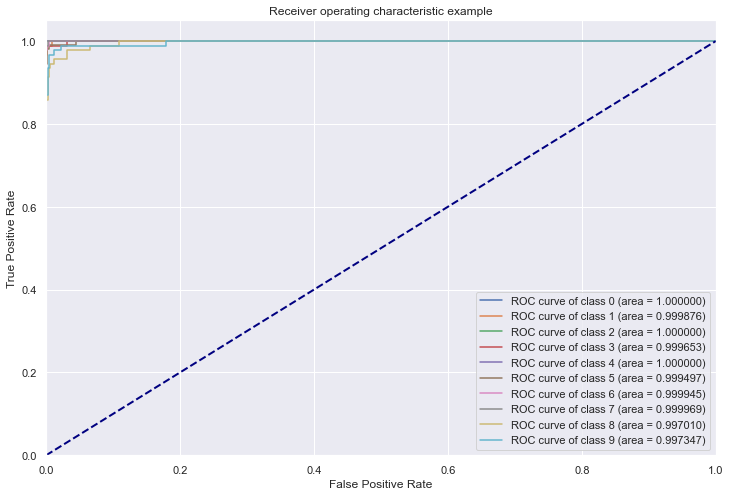

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from numpy import interp
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y.shape[1]



# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel='rbf', C=3, degree=0)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure(figsize=[12,8])

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i],label='ROC curve of class {0} (area = {1:f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


In [38]:
X  = digits.drop(columns="target").values
y = digits["target"].values

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 41  # número de atributos a seleccionar
selected_predictors = SelectKBest(f_classif, k=k).fit(X, y)
support_predictors = selected_predictors.get_support()
atributes = [digits.columns[i] for i in list(support_predictors.nonzero()[0])]
print(atributes)

['c02', 'c03', 'c05', 'c06', 'c09', 'c10', 'c12', 'c13', 'c17', 'c18', 'c19', 'c20', 'c21', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30', 'c33', 'c34', 'c35', 'c36', 'c37', 'c38', 'c41', 'c42', 'c43', 'c44', 'c45', 'c46', 'c50', 'c51', 'c52', 'c53', 'c54', 'c58', 'c59', 'c60', 'c61', 'c62']


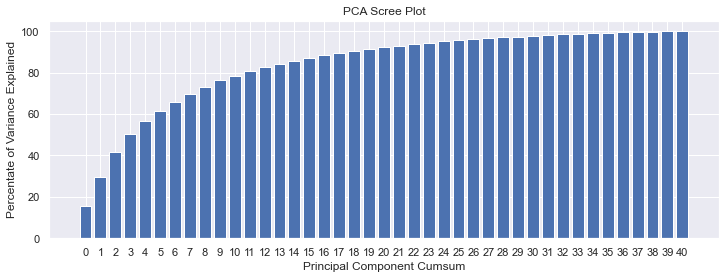

In [40]:
# PCA
scaler = StandardScaler()

embedding = PCA(n_components=41)
X_transform = embedding.fit_transform(digits[atributes])
    

percent_variance = np.round(embedding.explained_variance_ratio_* 100, decimals =2)

percent_variance_cum = np.cumsum(percent_variance)
columns = [str(x) for x in list(range(41))]

plt.figure(figsize=(12,4))
plt.bar(x= range(1,42), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

A partir del valor 21 se empieza a estabilizar.

In [41]:
df = pd.DataFrame(data = X_transform[:,list(range(21))], columns = ['PC'+str(i) for i in range(21)])
new_df = pd.concat([df, digits[['target']]],axis = 1)
new_df.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,target
0,-2.465203,21.577011,-7.340862,12.923538,-7.049580,-7.429009,2.500687,2.973861,-0.087295,3.736046,...,1.940946,-3.673016,0.715701,2.468816,2.323082,2.291393,3.523959,2.618817,-1.446748,0
1,8.786135,-20.805805,2.775286,-14.755315,6.118263,-6.370748,2.881072,-5.587767,-3.257613,-2.180173,...,-0.138948,-8.747219,-1.164353,-1.765151,1.025599,-7.305196,2.779185,-5.674585,-3.528670,1
2,6.839084,-9.827456,2.073580,-12.585517,-17.999035,-4.491799,2.072494,-15.928310,0.930106,4.990749,...,-2.055752,8.122475,-3.415800,-6.405054,-3.722025,4.608147,-2.045795,4.522276,-3.107199,2
3,-15.474911,2.230640,9.202691,-12.619176,7.042914,0.955270,0.325788,12.095603,-1.797088,5.927765,...,4.221851,-4.245958,2.167171,3.121474,2.159683,0.915130,2.743845,0.520080,2.338574,3
4,24.458342,5.075978,-5.016923,-13.121601,-0.306779,-3.868869,1.158203,12.958170,-1.928340,11.575619,...,-5.620267,0.413676,-8.969189,5.196533,-3.572277,-5.262728,-1.317390,1.742141,7.594935,4


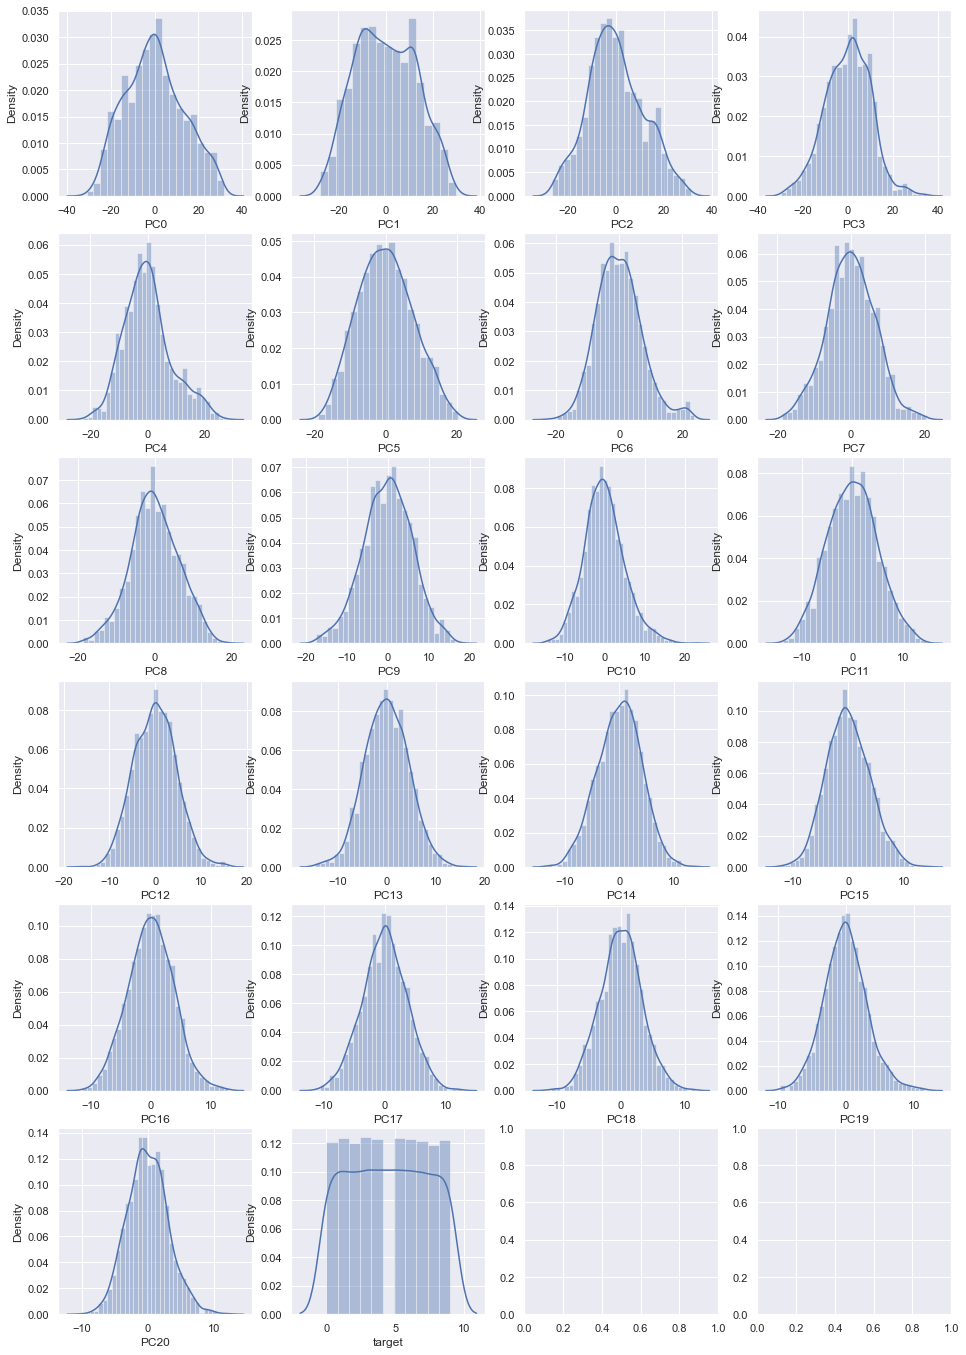

In [42]:
n_show = new_df.shape[1]

fig, axes = plt.subplots(figsize=(16,4*int(np.ceil(n_show/4))), nrows=int(np.ceil(n_show/4)), ncols=4)
for i,  column in enumerate(new_df.columns[:n_show]):
  sns.distplot(new_df[column], hist=True, rug=False, kde=True, ax=axes[i//4,i%4],label=column)
  i = i+1
plt.show()

In [43]:
X = new_df.drop(columns="target").values
y = new_df["target"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clasi=svm.SVC(kernel='rbf', C=3, degree=0)
clasi.fit(X_train,y_train)
y_pred= clasi.predict(X_test)
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        55
           1     0.9821    1.0000    0.9910        55
           2     1.0000    1.0000    1.0000        52
           3     1.0000    0.9821    0.9910        56
           4     0.9846    1.0000    0.9922        64
           5     0.9733    1.0000    0.9865        73
           6     1.0000    1.0000    1.0000        57
           7     1.0000    0.9839    0.9919        62
           8     0.9800    0.9423    0.9608        52
           9     0.9706    0.9706    0.9706        68

    accuracy                         0.9882       594
   macro avg     0.9891    0.9879    0.9884       594
weighted avg     0.9883    0.9882    0.9882       594



Conclusion:
* fijandonos en la precision, esta es de un 99% aprox, sigue siendo bueno.
* Ademas las distribuciones de las figuras mas arriba, representan distribuciones similares a la normal.

### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [44]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    Y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    Y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = Y_pred == Y_test
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = Y_pred != Y_test
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = np.array(Y_test)[mask]
    y_aux_pred = np.array(Y_pred)[mask]

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

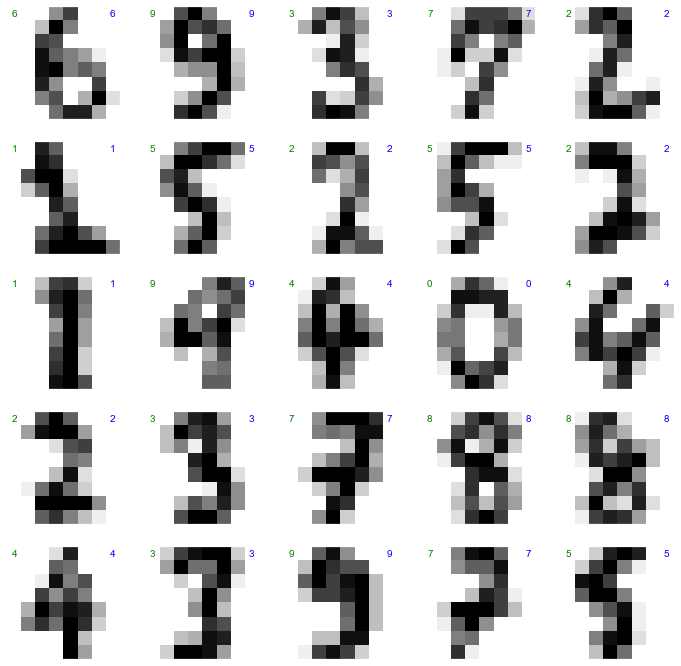

In [45]:
mostar_resultados(digits,svm.SVC(kernel='rbf', C=3, degree=0),nx=5, ny=5,label = "correctos")

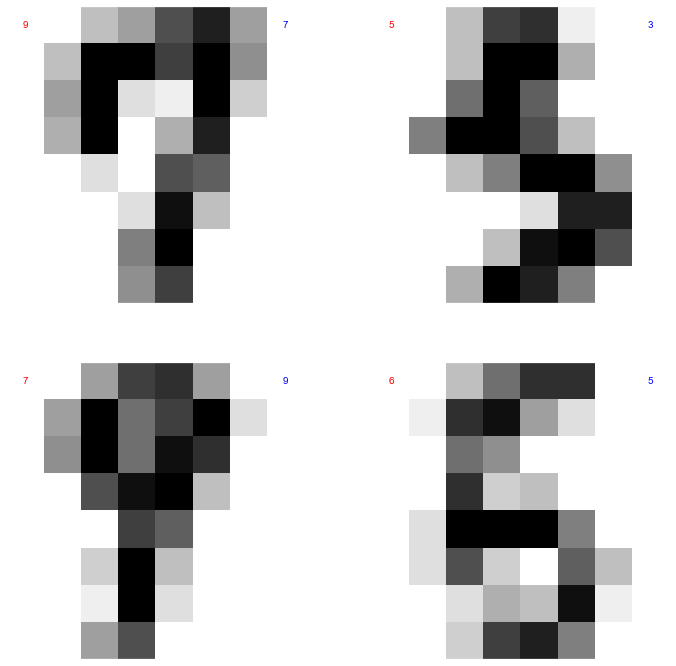

In [46]:
#distintos:
mostar_resultados(digits,svm.SVC(kernel='rbf', C=3, degree=0),nx=2, ny=2,label = "incorrectos")

Las fallas ocurren porque al estar tan pixeladas las imagenes, se confunde hasta para la vista del humano. Entonces para mejorar este modelo podriamos aumentar la cantidad de pixeles en los cuales se trabajan para que asi sea mas claro las imagenes.

### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

## II.- California Housing Prices


<img src="https://www.wartsila.com/images/default-source/default-album/california_housing.tmb-1920x690.jpg?sfvrsn=126bc44_1" width="480" height="240" align="center"/>

Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad. 
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo 
    1. Por lo menos debe comparar cuatro modelos
    2. Al menos tres de estos modelos tienen que tener hiperparámetros.
    3. Realizar optimización de hiperparámetros.
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: Puede tomar como referencia lo realizado en la sección **I.- Clasificación de dígitos**. El alumno tiene la libertad de desarrollar un análisis más completo del problema (si así lo desea). Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [47]:
# read data
housing = pd.read_csv('data/housing.csv',sep=',')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### EDA:

In [48]:
#Veamos la información general de los datos:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


tenemos valores nulos en la columna total_bedrooms

In [49]:
#borremos dichos valores:
housing.dropna(axis=0, inplace=True)

In [50]:
#verificamos:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [51]:
#reset del indice:
housing.reset_index(drop=True, inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:>

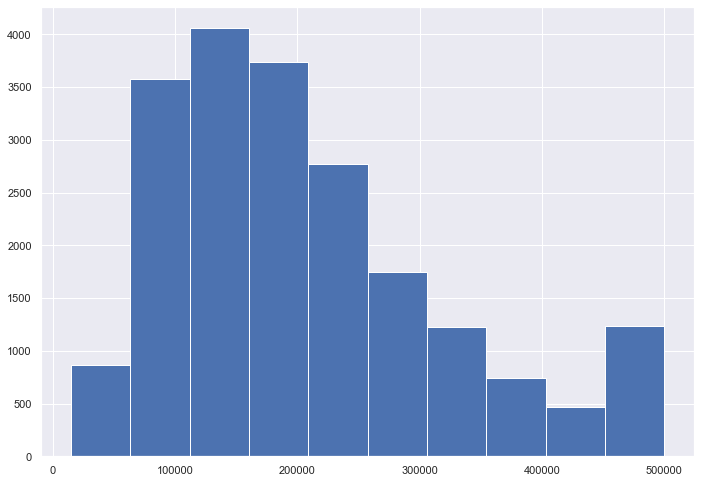

In [52]:
#veamos el histograma:
housing['median_house_value'].hist()

Veamos si es que existe correlación entre algunas variables:

In [53]:
df=housing.drop(['median_house_value'],axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


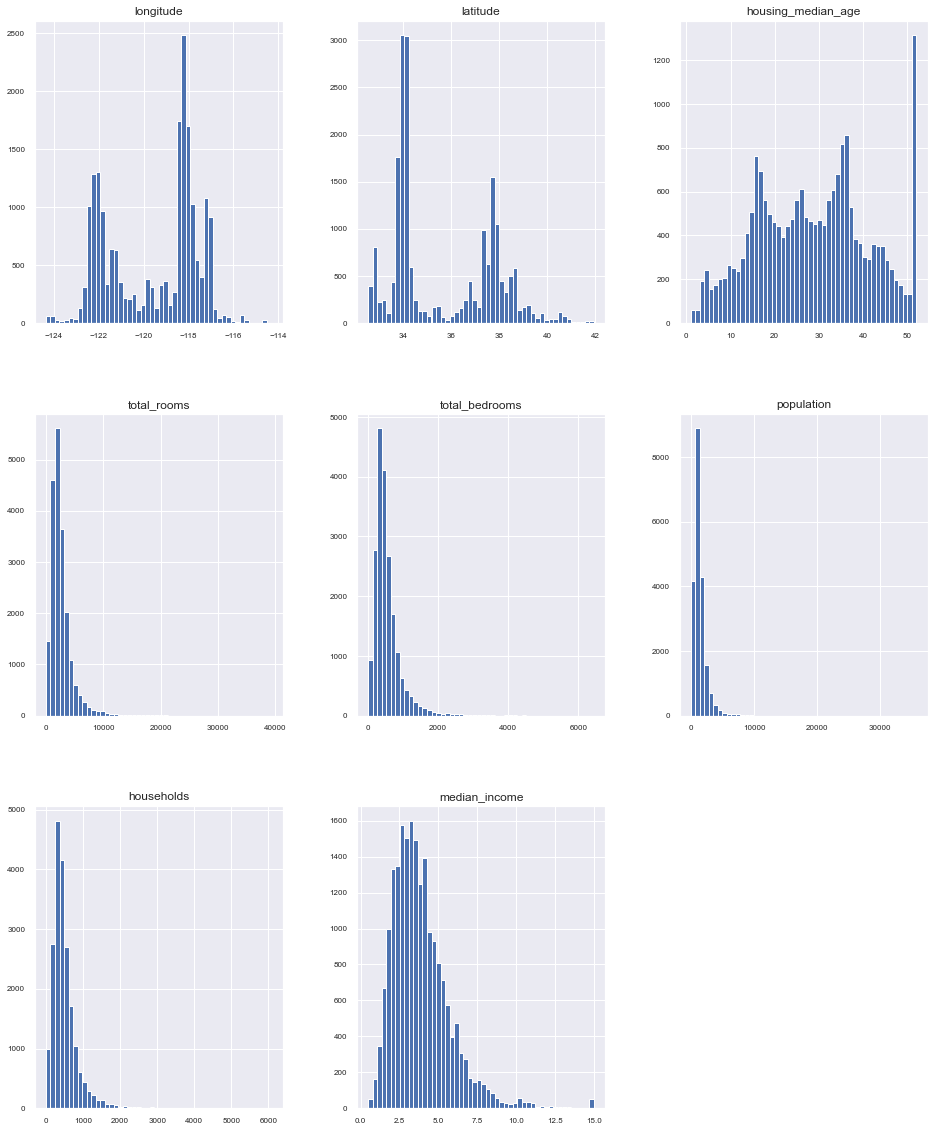

In [54]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [55]:
#correlación:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000


<AxesSubplot:>

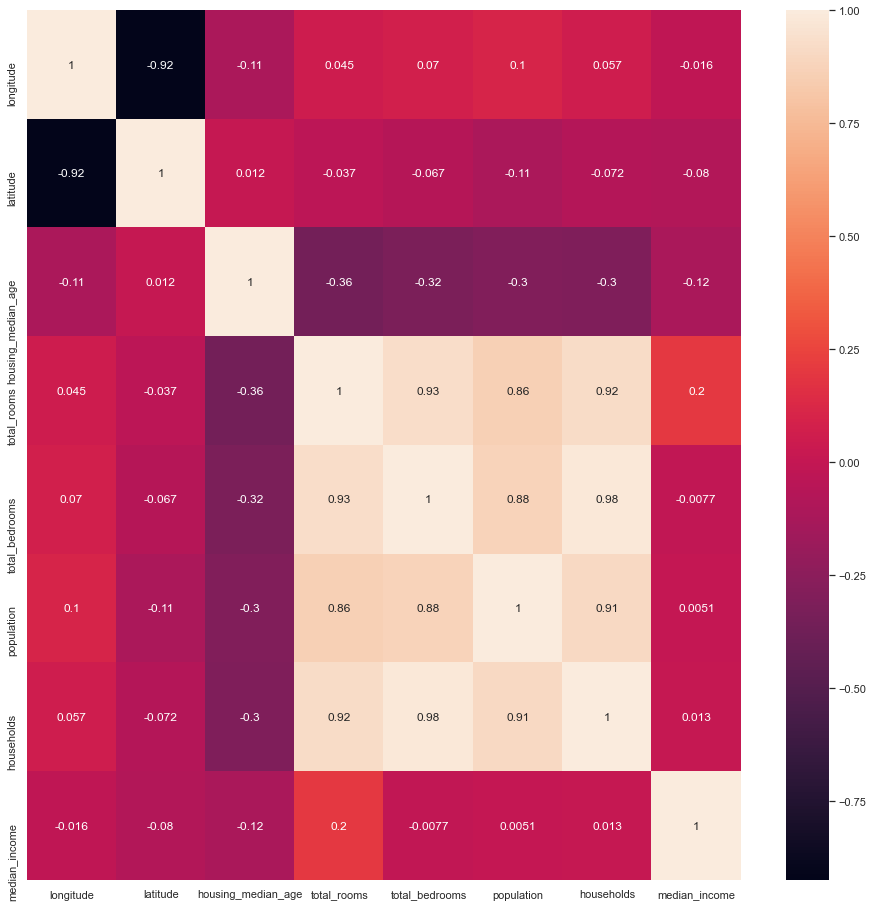

In [56]:
#heatmap:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True)

existe una gran correlación entre algunas variables (colores mas claros), esto nos dice que de alguna manera dichas variables nos entregan información de manera similar, podríamos dedicarnos a trabajar con menos variables de las que tenemos, pero en este caso no son tantas las variables involucradas, por lo tanto trabajaremos con todas

Es importante notar que hay variables categoricas y numericas, entonces tendremos que trabajarlas de otra manera

### Ahora procesaremos los datos:

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans

dado que tenemos variables categoricas y numericas, debemos trabajarlas aparte:

In [58]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [59]:
#usamos get dummies para deshacernos de las variables categoricas, pasandolas a numericas.
data = pd.get_dummies(housing, drop_first = True, prefix=None)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [60]:
data.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

trabajemos las variables numericas:

In [61]:
#eliminamos columnas no numericas:
numerical_data = data[['longitude', 'latitude', 'housing_median_age','total_rooms', 'total_bedrooms', 'population',
                       'households', 'median_income','median_house_value']]
numerical_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [62]:
#normalizamos:
sc=StandardScaler()
scaled_data = sc.fit(numerical_data)
sc_data = scaled_data.transform(numerical_data)

In [63]:
sc_data

array([[-1.32731375,  1.05171726,  0.98216331, ..., -0.97683327,
         2.34516291,  2.12881864],
       [-1.32232256,  1.04235526, -0.60621017, ...,  1.67037262,
         2.33263161,  1.31362603],
       [-1.33230494,  1.03767426,  1.85576873, ..., -0.84342665,
         1.78293943,  1.25818254],
       ...,
       [-0.82320322,  1.77727236, -0.92388486, ..., -0.17377773,
        -1.14317103, -0.99247676],
       [-0.87311515,  1.77727236, -0.84446619, ..., -0.39350628,
        -1.05513604, -1.05831591],
       [-0.83318561,  1.74918635, -1.00330353, ...,  0.07995643,
        -0.78060586, -1.01759959]])

In [64]:
df2=pd.DataFrame(data= sc_data, columns=numerical_data.columns)
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418


Ahora, trabajemos la variable categorica existente, esta es ocean_proximity:

In [65]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [66]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [67]:
#creamos el data frame con las variables categoricas:
categorical_data = data[['ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]

In [68]:
#concatenamos:
df_procesado=pd.concat([df2,categorical_data], axis=1)
df_procesado.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,0,0,1,0
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,0,0,1,0
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,0,0,1,0
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,0,0,1,0
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,0,0,1,0


### Modelos:

In [69]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNetCV
from sklearn.decomposition  import PCA

#### Linear Regression:

In [70]:
df_procesado.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,0,0,1,0
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,0,0,1,0
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,0,0,1,0
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,0,0,1,0
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,0,0,1,0


In [71]:
X = df_procesado.drop('median_house_value',axis=1)
y = df_procesado["median_house_value"]


In [72]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,0,0,1,0
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,0,0,1,0
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,0,0,1,0
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,0,0,1,0
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,0,0,1,0


In [73]:
y.head()

0    2.128819
1    1.313626
2    1.258183
3    1.164622
4    1.172418
Name: median_house_value, dtype: float64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [75]:
X_train.shape

(16346, 12)

In [76]:
y_train.shape

(16346,)

In [77]:
model1_new=LinearRegression()
model1_new.fit(X_train, y_train)
y_true =  list(y_test)
y1_pred = list(model1_new.predict(X_test))

In [78]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
print("RL\n")
# de aqui predice para el conjunto de train
print("_____________________________")
print("conjunto de train")
pred_train_lr= model1_new.predict(X_train)
print("RMSE ", np.sqrt(mean_squared_error(y_train,pred_train_lr))) #RMSE error cuadratico medio
print("R^2 ",r2_score(y_train, pred_train_lr)) #R_cuadrado 
# de aqui predice para el conjunto de validacion
print("_____________________________")
print("_____________________________")
print("conjunto de validacion")
pred_test_lr= model1_new.predict(X_test)
print("RMSE ",np.sqrt(mean_squared_error(y_test,pred_test_lr))) #RMSE
print("R^2 ",r2_score(y_test, pred_test_lr))  #R_cuadrado (cor de pearson)
print("_____________________________")
print("MAPE")
print(np.mean(np.abs(((y_test - model1_new.predict(X_test))/y_test)))*100)
print("_____________________________\n\n")

RL

_____________________________
conjunto de train
RMSE  0.5933086744494183
R^2  0.6456482397646102
_____________________________
_____________________________
conjunto de validacion
RMSE  0.6003292935843447
R^2  0.6488402154431993
_____________________________
MAPE
243.67789614295705
_____________________________




#### Random Forest:

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
model2_new= RandomForestRegressor()
model2_new.fit(X_train, y_train)
y_true =  list(y_test)
y2_pred = list(model2_new.predict(X_test))

In [81]:
pred_train_random_forest = model2_new.predict(X_train)
print("_____________________________")
print("conjunto de train")
#para train
print("RMSE ",np.sqrt(mean_squared_error(y_train,pred_train_random_forest)))
print("R^2 ",r2_score(y_train, pred_train_random_forest))
print("_____________________________")
print("_____________________________")
print("conjunto de validacion")
#para validacion
pred_test_random_forest = model2_new.predict(X_test)
print("RMSE ",np.sqrt(mean_squared_error(y_test,pred_test_random_forest)))
print("R^2 ",r2_score(y_test, pred_test_random_forest))

print("_____________________________")
print("MAPE")
print(np.mean(np.abs(((y_test - model2_new.predict(X_test))/y_test)))*100)
print("_____________________________\n\n")

_____________________________
conjunto de train
RMSE  0.15665017246717783
R^2  0.9752978387004567
_____________________________
_____________________________
conjunto de validacion
RMSE  0.42144752816229625
R^2  0.8269336140655938
_____________________________
MAPE
174.03253957376958
_____________________________




#### KNN

In [82]:
from sklearn.neighbors import KNeighborsRegressor

In [83]:
model3_new= KNeighborsRegressor()
model3_new.fit(X_train, y_train)
y_true =  list(y_test)
y3_pred = list(model3_new.predict(X_test))

In [84]:
pred_train_knn = model3_new.predict(X_train)
print("_____________________________")
print("conjunto de train")
#para train
print("RMSE ",np.sqrt(mean_squared_error(y_train,pred_train_knn)))
print("R^2 ",r2_score(y_train, pred_train_knn))
print("_____________________________")
print("_____________________________")
print("conjunto de validacion")
#para validacion
pred_test_knn = model3_new.predict(X_test)
print("RMSE ",np.sqrt(mean_squared_error(y_test,pred_test_knn)))
print("R^2 ",r2_score(y_test, pred_test_knn))

print("_____________________________")
print("MAPE")
print(np.mean(np.abs(((y_test - model3_new.predict(X_test))/y_test)))*100)
print("_____________________________\n\n")

_____________________________
conjunto de train
RMSE  0.42780585904336593
R^2  0.8157673263095129
_____________________________
_____________________________
conjunto de validacion
RMSE  0.5387754115932047
R^2  0.7171597337971325
_____________________________
MAPE
169.7468843645392
_____________________________




Mejor modelos es random forest. Luego:


In [85]:
model_final=RandomForestRegressor()
model_final.fit(X_train, y_train)
y_pred=model_final.predict(X_test)

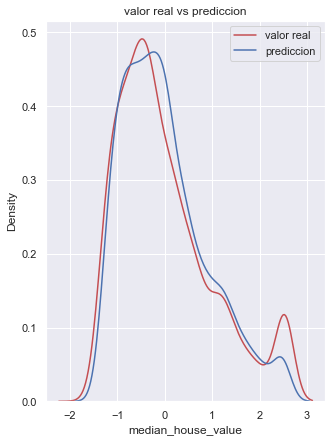

In [86]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test, hist=False, color="r", label="valor real")
sns.distplot(y_pred, hist=False, color="b", label="prediccion" , ax=ax)


plt.title('valor real vs prediccion')
plt.legend()

plt.show()
plt.close()

En conclusion, es un buen modelo.